<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/word_populatirity_in_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we follow the 10 most popular words in time .
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata
</font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata

<br>
<font size="3">     
After installing the needed libraries we will read our data from output.csv and fill all null values to avoid future problems with our text editing. Furthurmore we will design the the functions that we'll use in our project. 
<br>
In the next block we define three functions:
    
- **find_top(x):** gets as input string all articles and returns the 10 most common used words.
- **common_year(x):** gets as imput a year and returns all articles combines in one list of words and the number of articles published the given year.
- **plot_barchart(x,y):** gets as input a dictionary and a word, the dictionary containes the times the given word was counted each year
</font>
<br>
<br>

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#get the article body
articles = list(df['article_body'])

#function to find the 10 most common words
def find_top(articles):
    #initiate an empty list to save all the words of all the articles
    all_words_compined = []
    
    for words in articles:
        #split the articles to words
        word_list = words.split()
        #save the words to our list
        all_words_compined.extend(word_list)
        
    #find the 500 most common
    top = Counter(all_words_compined).most_common(10)
    return top

#give the year of interest and return the 100 most popular words of the whole data 
# min year is 2013 max year is 2020
def common_year(year):
    text0 = " "
    counter = 0
    for row_index,row in df.iterrows():
        date = row['article_date']
        text = row['article_body']
        if re.search(r'\d\d\d\d',date).group(0) == year:
            counter += 1
            text0 = text0 + text

    text_to_words = text0.split()
    
    #top = Counter(text_to_words).most_common(100)
    return (text_to_words,counter)

def plot_barchart(year_dict,word):
    year = []
    count = []
    for key in year_dict:
        year.append(key)
        count.append(year_dict[key])

    plt.figure(figsize=(15, 5))
    plt.bar(year, count)
    plt.title('Bar chart for the word '+word+' in years from 2013-2020')
    plt.grid(axis='y')
    plt.show()  


<br>
<font size="3">     
The idea is that after counting the times a word appears in each year's articles we will devide it by the total publications that happend that year to get a better understanding of the actual popularity of the word.
</font>
<br>
<br>

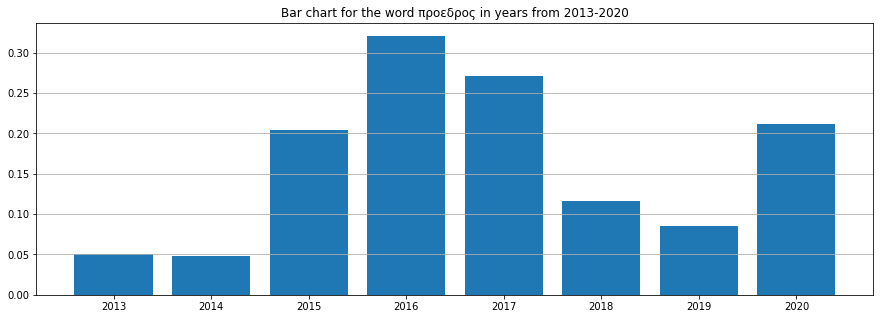

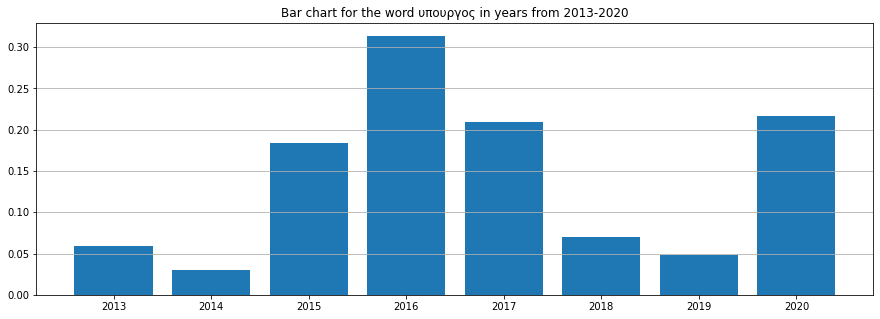

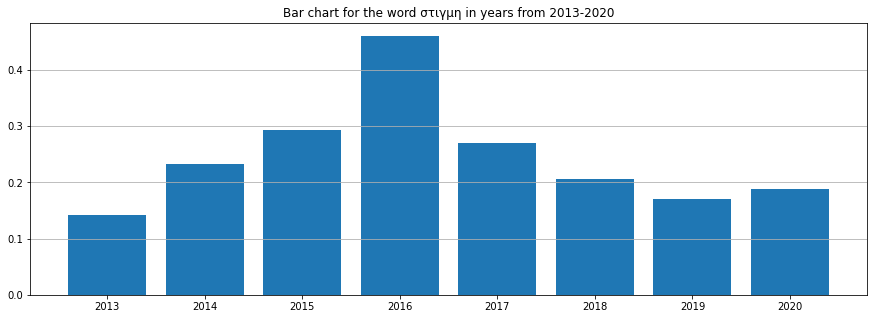

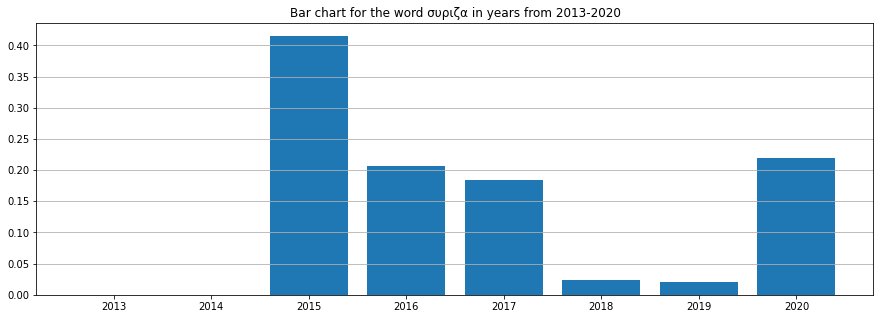

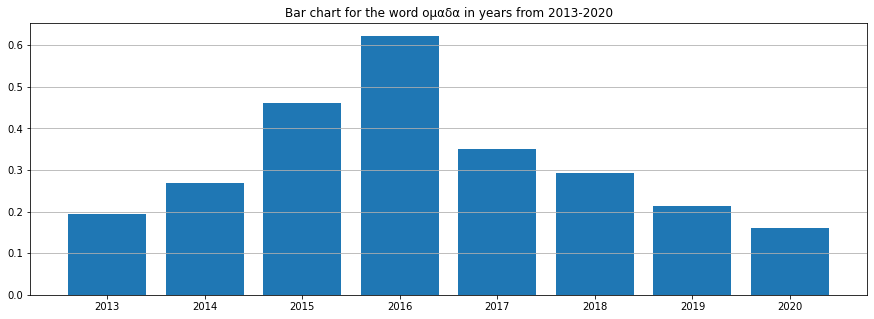

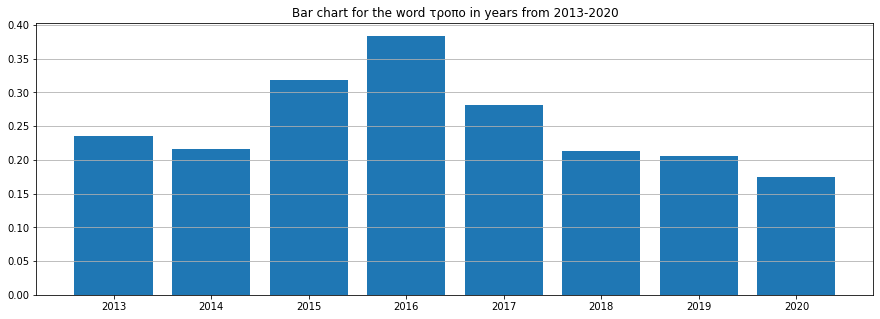

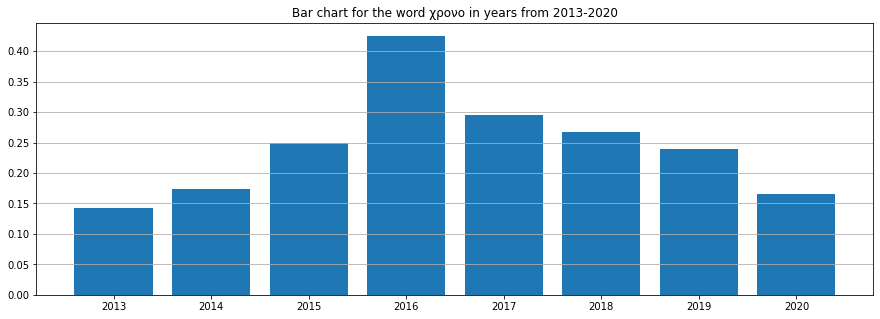

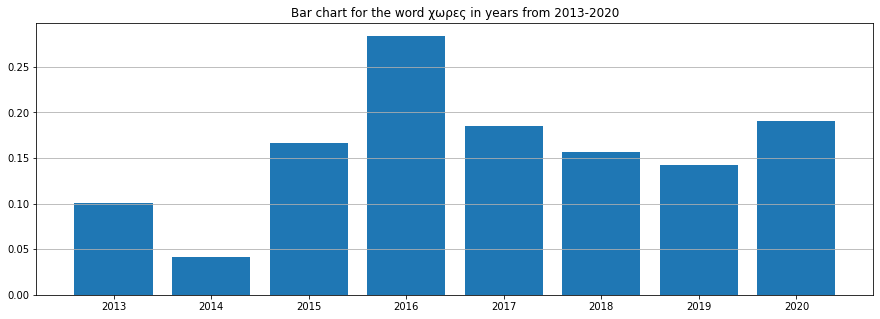

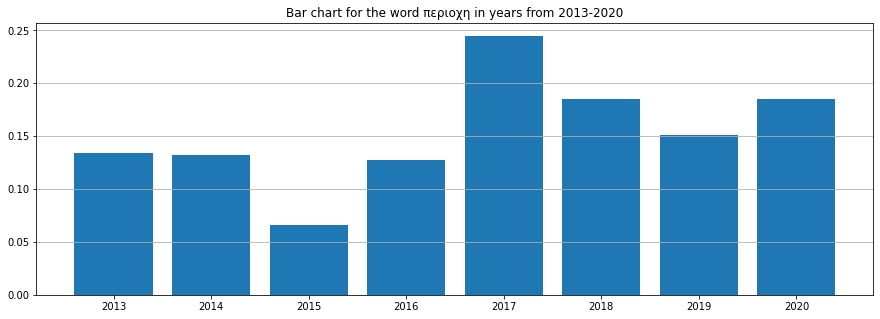

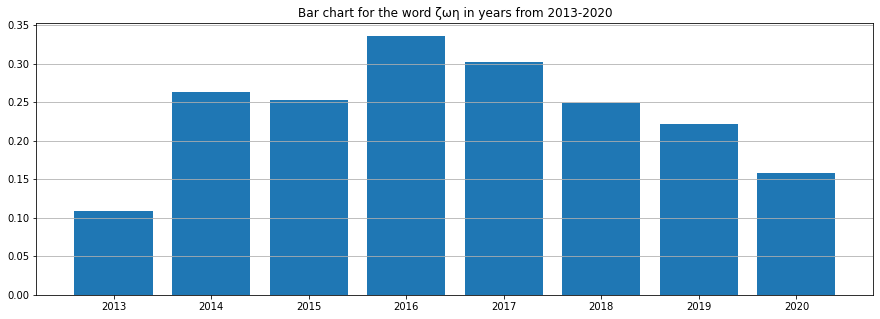

In [ ]:
#get the top 10 most popular words
top = find_top(articles)

#loop over each word, create an new dict with the years for key and zero value
#rotate over each years articles and count the times the words appears
#plot a bar chart for each word

for i in top:
    #create a list with the years from 2013 to 2020
    years = []
    for k in range(2013, 2021):
        years.append(k)
        
    #create dict with years as key and 0 for value   
    year_dict = {k:(0,0) for k in years}

    #rotate over the keys and count 
    for year in year_dict:
        
        res = common_year(str(year))
        text = res[0]
        counter = res[1]
        
        #devide the number of time the words appeared with the number of each years articles
        temp = (text.count(i[0])/counter)

        year_dict.update({year:temp})
        #neg_dict.update({y:neg_dict[y]+1})
        

    plot_barchart(year_dict,i[0])
    
    